# CNN on MNIST Dataset

In [1]:
#import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
tf.config.experimental.set_memory_growth = True

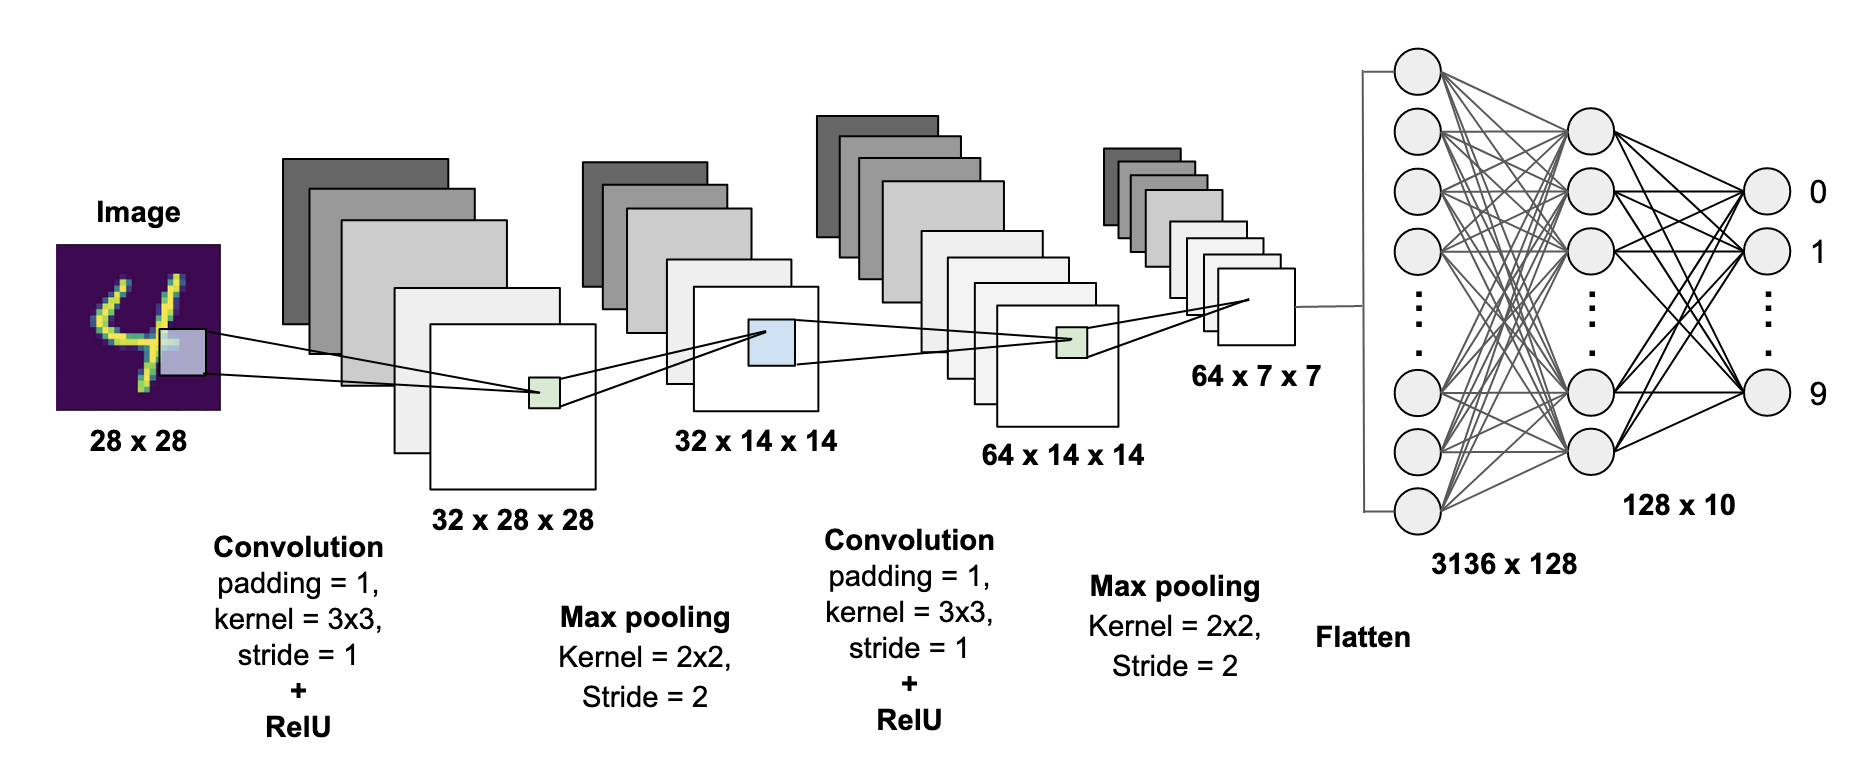

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
testy.shape

(10000,)

In [5]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


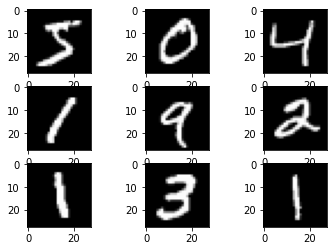

In [6]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [7]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [8]:
type(trainX)

numpy.ndarray

In [9]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [10]:
testY[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')

In [12]:
trainX_norm = trainX_norm / 255.0
testX_norm = testX_norm / 255.0

In [13]:
#trainX_norm[1]

# Define CNN Model

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',strides=(1, 1),input_shape=(28, 28, 1)))

In [16]:
model.add(MaxPooling2D((2, 2)))

In [17]:
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))

In [18]:
#model.add(MaxPooling2D((2, 2)))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [21]:
opt = SGD(lr=0.0001, momentum=0.8)

C:\Users\Dr.PVVK\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [22]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(trainX, trainY, epochs=200, batch_size=32, validation_data=(testX, testY), verbose=1)

Epoch 1/200
1875/1875 [==============================] - 13s 4ms/step - loss: 2.4937 - accuracy: 0.6463 - val_loss: 0.8979 - val_accuracy: 0.7779 - accura - ETA: 1s - los - ETA: 0s - loss: 2.5996 - accuracy - ETA: 0s - loss: 2.5375 - accuracy: 
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7163 - accuracy: 0.8372 - val_loss: 0.6021 - val_accuracy: 0.8458
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5104 - accuracy: 0.8616 - val_loss: 0.4356 - val_accuracy: 0.8944
Epoch 4/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3613 - accuracy: 0.9041 - val_loss: 0.3319 - val_accuracy: 0.92390s - loss: 0.3629 - accuracy
Epoch 5/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2839 - accuracy: 0.9241 - val_loss: 0.2901 - val_accuracy: 0.9313
Epoch 6/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2346 - accuracy: 0.9362 - val_loss: 0.2511 - val_accuracy: 0.9408
Ep

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.1512 - val_accuracy: 0.9752
Epoch 55/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.1535 - val_accuracy: 0.9740
Epoch 56/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.1545 - val_accuracy: 0.9738
Epoch 57/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.1526 - val_accuracy: 0.9746TA
Epoch 58/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1572 - val_accuracy: 0.9742
Epoch 59/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.1625 - val_accuracy: 0.9726
Epoch 60/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.1543 - val_accura

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1901 - val_accuracy: 0.9763.0 - ETA: 1s - loss: 0.0047 - accu - E
Epoch 110/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.1901 - val_accuracy: 0.9757
Epoch 111/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.1914 - val_accuracy: 0.9759
Epoch 112/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.1906 - val_accuracy: 0.9759s: 0.005 -
Epoch 113/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.1896 - val_accuracy: 0.9755
Epoch 114/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.1924 - val_accuracy: 0.9766
Epoch 115/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.004

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.1958 - val_accuracy: 0.9760
Epoch 164/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.1891 - val_accuracy: 0.9762
Epoch 165/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.1938 - val_accuracy: 0.9765
Epoch 166/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.1936 - val_accuracy: 0.9766
Epoch 167/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.1964 - val_accuracy: 0.9765
Epoch 168/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.1972 - val_accuracy: 0.9759
Epoch 169/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.1915 - val_ac

In [24]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 97.600


2


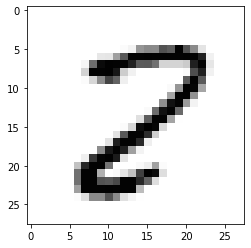

In [25]:
image_index = 444
pyplot.imshow(testX[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(testX[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())